In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, AveragePooling2D
# from keras_visualizer import visualizer 
import tensorflow as tf

# Dataset

## Loading the Dataset

In [3]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print('Training Images', trainX.shape)
print('Training Labels', trainy.shape)
print('\nTesting Images', testX.shape)
print('Test Labels', testy.shape)

Training Images (60000, 28, 28)
Training Labels (60000,)

Testing Images (10000, 28, 28)
Test Labels (10000,)


## PreProcessing the Data
# Scaling the Data


In [5]:
trainX = trainX/255.0
testX = testX/255.0

image_size = trainX[0].shape

trainX = trainX.reshape(len(trainy), image_size[0], image_size[1], 1)
testX = testX.reshape(len(testy), image_size[0], image_size[1], 1)

trainy = to_categorical(trainy)
testy = to_categorical(testy)

## Visualizing Sample of Training Images

<Axes: ylabel='count'>

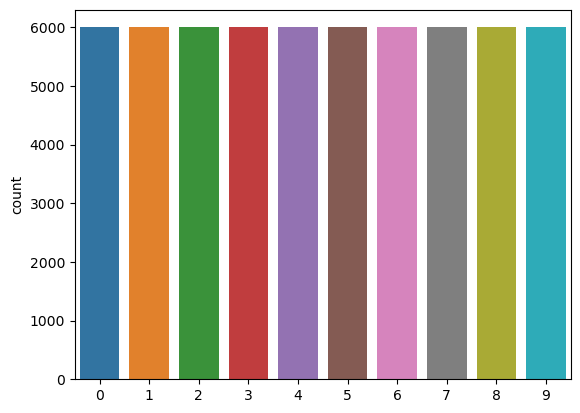

In [6]:
sns.countplot(x=np.argmax(trainy, axis=1))

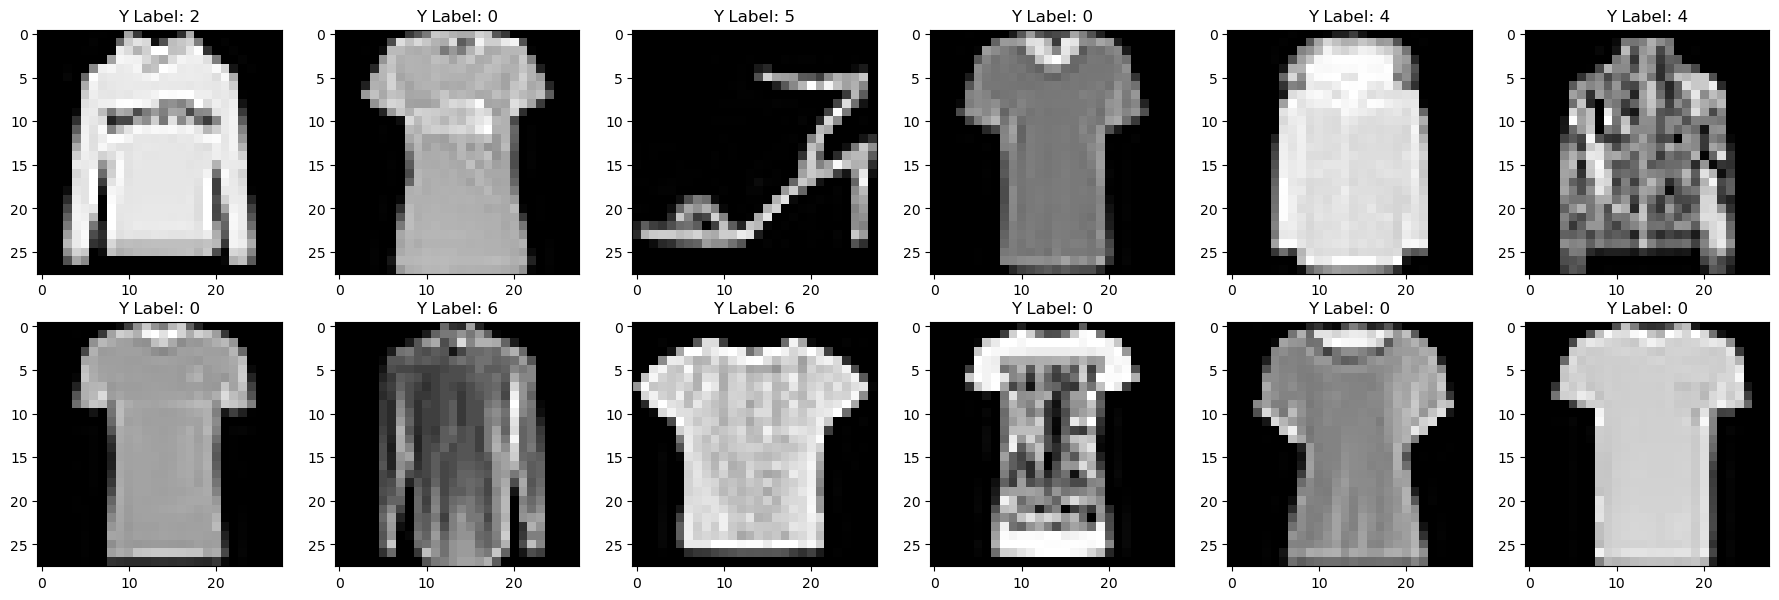

In [7]:
fig, ax = plt.subplots(2, 6, figsize = (18,6))
img_disp = np.random.randint(0, len(trainy), (2,6))
for i in range(2):
    for j in range(6):
        ax[i,j].imshow(trainX[img_disp[i,j],:,:,0], cmap = 'gray')
        ax[i,j].set_title(f'Y Label: {np.argmax(trainy[img_disp[i,j]])}')


plt.tight_layout()



# CNN Architecture

In [9]:
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(image_size[0], image_size[1], 1)))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(128, 
                 kernel_size=(3, 3),
                 padding="SAME", 
                 activation='relu'))

model.add(Conv2D(256, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(AveragePooling2D((2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu'))

model.add(Conv2D(1024, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (16, 26, 26, 32)         320       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (16, 13, 13, 32)         0         
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (16, 13, 13, 128)        36992     
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (16, 11, 11, 256)        295168    
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (16, 5, 5, 256)          0

## Model Training

In [11]:
history = model.fit(trainX, trainy,
                    validation_data = (testX, testy),
                    epochs = 8,
                    batch_size = 16,
                    verbose=1)

Epoch 1/8
3750/3750 [==============================] - 1880s 501ms/step - loss: 0.4621 - accuracy: 0.8278 - val_loss: 0.3994 - val_accuracy: 0.8445
Epoch 2/8
3750/3750 [==============================] - 2663s 710ms/step - loss: 0.2960 - accuracy: 0.8902 - val_loss: 0.3056 - val_accuracy: 0.8925
Epoch 3/8
3750/3750 [==============================] - 2311s 616ms/step - loss: 0.2493 - accuracy: 0.9083 - val_loss: 0.2679 - val_accuracy: 0.9070
Epoch 4/8
3750/3750 [==============================] - 2191s 584ms/step - loss: 0.2181 - accuracy: 0.9196 - val_loss: 0.2860 - val_accuracy: 0.9029
Epoch 5/8
3750/3750 [==============================] - 2128s 568ms/step - loss: 0.1928 - accuracy: 0.9282 - val_loss: 0.3074 - val_accuracy: 0.8979
Epoch 6/8
3750/3750 [==============================] - 9213s 2s/step - loss: 0.1767 - accuracy: 0.9351 - val_loss: 0.2903 - val_accuracy: 0.9142
Epoch 7/8
3750/3750 [==============================] - 1890s 504ms/step - loss: 0.1582 - accuracy: 0.9416 - val_los

## Saving the Trained Model

In [14]:
model.save_weights('FMNIST_classification_Epoch8.keras')

# Plot the accuracy and loss


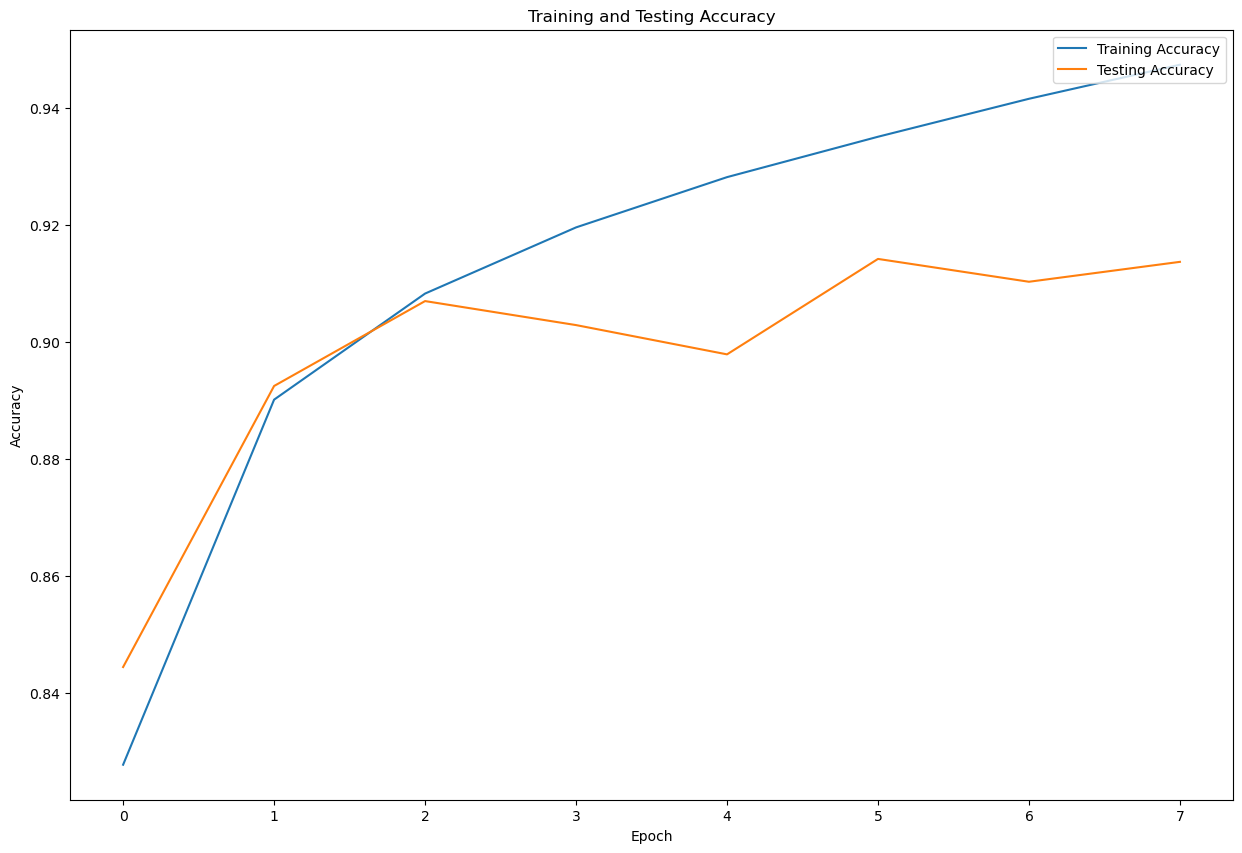

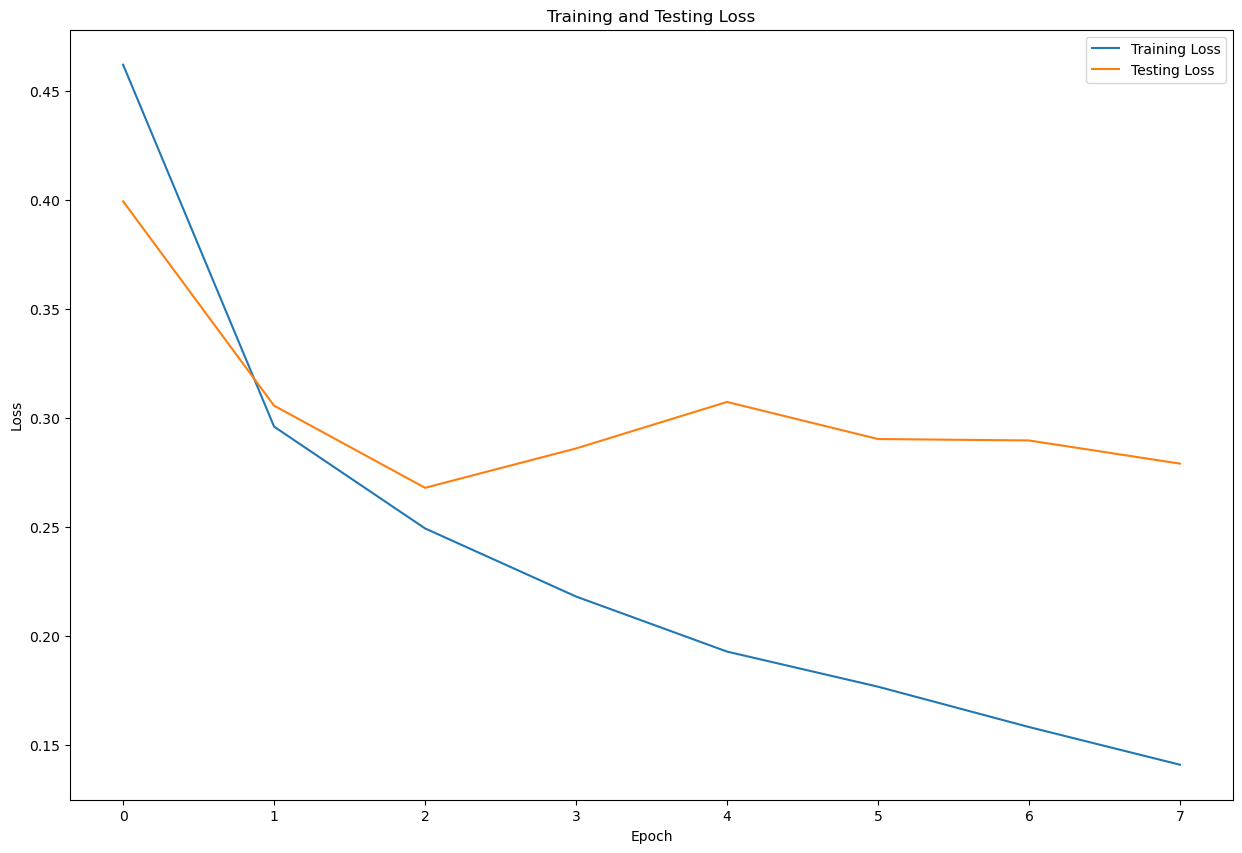

In [16]:
# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()